In [1]:
#10.1.1 희소표현(Sparse Representation)

In [2]:
import pandas as pd
class2=pd.read_csv("../chap10/data/class2.csv")

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

train_x = label_encoder.fit_transform(class2['class2'])
train_x

array([2, 2, 1, 0, 1, 0])

In [3]:
#10.1.2 횟수기반 임베딩
#Counter Vector

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is last chance.',
    'and if you do not have this chance.',
    'you will never get any chance.',
    'will you do get this one?',
    'please, get this chance',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 13,
 'is': 7,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 15,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 14,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

In [5]:
vect.transform(['you will never get any chance.']).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [6]:
vect = CountVectorizer(stop_words=["and", "is", "please", "this"]).fit(corpus)
vect.vocabulary_

{'last': 6,
 'chance': 1,
 'if': 5,
 'you': 11,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 10,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

In [7]:
#TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc = ['I like machine learning', 'I love deep learning', 'I run everyday']
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
doc_distance = (tfidf_matrix * tfidf_matrix.T)
print ('유사도를 위한', str(doc_distance.get_shape()[0]), 'x', str(doc_distance.get_shape()[1]), 'matrix를 만들었습니다.')
print(doc_distance.toarray())

유사도를 위한 3 x 3 matrix를 만들었습니다.
[[1.       0.224325 0.      ]
 [0.224325 1.       0.      ]
 [0.       0.       1.      ]]


In [9]:
#10.1.3 예측기반 임베딩
# Word2Vec

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec
  
sample = open("../chap10/data/peter.txt", "r", encoding='UTF8')
s = sample.read() 
  
f = s.replace("\n", " ")
data = [] 
  
for i in sent_tokenize(f):
    temp = [] 
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp) 

data

[['once',
  'upon',
  'a',
  'time',
  'in',
  'london',
  ',',
  'the',
  'darlings',
  'went',
  'out',
  'to',
  'a',
  'dinner',
  'party',
  'leaving',
  'their',
  'three',
  'children',
  'wendy',
  ',',
  'jhon',
  ',',
  'and',
  'michael',
  'at',
  'home',
  '.'],
 ['after',
  'wendy',
  'had',
  'tucked',
  'her',
  'younger',
  'brothers',
  'jhon',
  'and',
  'michael',
  'to',
  'bed',
  ',',
  'she',
  'went',
  'to',
  'read',
  'a',
  'book',
  '.'],
 ['she', 'heard', 'a', 'boy', 'sobbing', 'outside', 'her', 'window', '.'],
 ['he', 'was', 'flying', '.'],
 ['there', 'was', 'little', 'fairy', 'fluttering', 'around', 'him', '.'],
 ['wendy', 'opened', 'the', 'window', 'to', 'talk', 'to', 'him', '.'],
 ['“', 'hello', '!'],
 ['who', 'are', 'you', '?'],
 ['why', 'are', 'you', 'crying', '”', ',', 'wendy', 'asked', 'him', '.'],
 ['“', 'my', 'name', 'is', 'peter', 'pan', '.'],
 ['my',
  'shadow',
  'wouldn',
  '’',
  't',
  'stock',
  'to',
  'me.',
  '”',
  ',',
  'he',
  'rep

In [11]:
#CBOW

In [12]:
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              vector_size = 100, window = 5, sg=0)
print("Cosine similarity between 'peter' " +
                 "wendy' - CBOW : ", 
      model1.wv.similarity('wendy', 'wendy'))

Cosine similarity between 'peter' wendy' - CBOW :  1.0


In [13]:
print("Cosine similarity between 'peter' " +
                 "hook' - CBOW : ", 
      model1.wv.similarity('peter', 'hook')) 

Cosine similarity between 'peter' hook' - CBOW :  0.027709894


In [14]:
#Skip-gram

In [15]:
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, 
                                             window = 5, sg = 1)
print("Cosine similarity between 'peter' " +
          "wendy' - Skip Gram : ", 
    model2.wv.similarity('peter', 'wendy'))

Cosine similarity between 'peter' wendy' - Skip Gram :  0.40088683


In [16]:
print("Cosine similarity between 'peter' " +
            "hook' - Skip Gram : ", 
      model2.wv.similarity('peter', 'hook')) 

Cosine similarity between 'peter' hook' - Skip Gram :  0.52016735


In [17]:
#FastText

In [18]:
from gensim.test.utils import common_texts
from gensim.models import FastText

model = FastText('../chap10/data/peter.txt', vector_size=4, window=3, min_count=1, epochs=10)

In [19]:
sim_score = model.wv.similarity('peter', 'wendy')
print(sim_score)

0.45924556


In [20]:
sim_score = model.wv.similarity('peter', 'hook')
print(sim_score)

0.043825187


In [6]:
from gensim.models import KeyedVectors

model_kr = KeyedVectors.load_word2vec_format('../chap10/data/wiki.ko.vec')

In [7]:
find_similar_to = '노력'

for similar_word in model_kr.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(
        similar_word[0], similar_word[1]
    ))

Word: 노력함, Similarity: 0.80
Word: 노력중, Similarity: 0.75
Word: 노력만, Similarity: 0.72
Word: 노력과, Similarity: 0.71
Word: 노력의, Similarity: 0.69
Word: 노력가, Similarity: 0.69
Word: 노력이나, Similarity: 0.69
Word: 노력없이, Similarity: 0.68
Word: 노력맨, Similarity: 0.68
Word: 노력보다는, Similarity: 0.68


In [8]:
similarities = model_kr.most_similar(positive=['동물', '육식동물'], negative=['사람'])
print(similarities)

[('초식동물', 0.7804122567176819), ('거대동물', 0.7547270655632019), ('육식동물의', 0.7547166347503662), ('유두동물', 0.753511369228363), ('반추동물', 0.7470757961273193), ('독동물', 0.7466291785240173), ('육상동물', 0.746031641960144), ('유즐동물', 0.7450903654098511), ('극피동물', 0.7449344396591187), ('복모동물', 0.742434561252594)]


In [24]:
#10.1.4 횟수/예측기반 임베딩
#GloVe

In [25]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('../chap10/data/glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [26]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
model.most_similar('bill')

[('legislation', 0.8072139620780945),
 ('proposal', 0.730686366558075),
 ('senate', 0.7142541408538818),
 ('bills', 0.704440176486969),
 ('measure', 0.6958035230636597),
 ('passed', 0.690624475479126),
 ('amendment', 0.6846879720687866),
 ('provision', 0.6845567226409912),
 ('plan', 0.6816462874412537),
 ('clinton', 0.6663140058517456)]

In [27]:
model.most_similar('cherry') 

[('peach', 0.688809871673584),
 ('mango', 0.683819055557251),
 ('plum', 0.6684104204177856),
 ('berry', 0.6590359210968018),
 ('grove', 0.658155083656311),
 ('blossom', 0.6503506302833557),
 ('raspberry', 0.6477391719818115),
 ('strawberry', 0.6442098021507263),
 ('pine', 0.6390928626060486),
 ('almond', 0.6379212737083435)]

In [28]:
model.most_similar(negative='cherry')

[('str94', 0.5899437069892883),
 ('http://www.ecb.int', 0.5723982453346252),
 ('rw95', 0.5641242265701294),
 ('js04bb', 0.5608091354370117),
 ('http://www.opel.com', 0.5586654543876648),
 ('obloquy', 0.5543686151504517),
 ('backstrap', 0.5506628155708313),
 ('disinfects', 0.5451074838638306),
 ('shepherdesses', 0.5444405674934387),
 ('hereros', 0.5441645383834839)]

In [29]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [30]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]
analogy('australia', 'beer', 'france')

'champagne'

In [31]:
analogy('tall', 'tallest', 'long')

'longest'

In [32]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [1]:
#10.2 Transformer attention
#10.2.1 Seq2seq

In [2]:
from __future__ import unicode_literals, print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd

import os
import re
import random

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
SOS_token = 0
EOS_token = 1
MAX_LENGTH = 20

class Lang:
    def __init__(self):
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "SOS", 1: "EOS"}
        self.n_words = 2  

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [4]:
def normalizeString(df, lang):
    sentence = df[lang].str.lower()
    sentence = sentence.str.replace('[^A-Za-z\s]+', '')
    sentence = sentence.str.normalize('NFD')
    sentence = sentence.str.encode('ascii', errors='ignore').str.decode('utf-8')
    return sentence

def read_sentence(df, lang1, lang2):
    sentence1 = normalizeString(df, lang1)
    sentence2 = normalizeString(df, lang2)
    return sentence1, sentence2

def read_file(loc, lang1, lang2):
    df = pd.read_csv(loc, delimiter='\t', header=None, names=[lang1, lang2])
    return df

def process_data(lang1,lang2):
    df = read_file('../chap10/data/%s-%s.txt' % (lang1, lang2), lang1, lang2)
    sentence1, sentence2 = read_sentence(df, lang1, lang2)

    input_lang = Lang()
    output_lang = Lang()
    pairs = []
    for i in range(len(df)):
        if len(sentence1[i].split(' ')) < MAX_LENGTH and len(sentence2[i].split(' ')) < MAX_LENGTH:
            full = [sentence1[i], sentence2[i]]
            input_lang.addSentence(sentence1[i])
            output_lang.addSentence(sentence2[i])
            pairs.append(full)

    return input_lang, output_lang, pairs

In [5]:
def indexesFromSentence(lang, sentence):
    return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence):
    indexes = indexesFromSentence(lang, sentence)
    indexes.append(EOS_token)
    return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(input_lang, output_lang, pair):
    input_tensor = tensorFromSentence(input_lang, pair[0])
    target_tensor = tensorFromSentence(output_lang, pair[1])
    return (input_tensor, target_tensor)

In [6]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, embbed_dim, num_layers):
        super(Encoder, self).__init__()       
        self.input_dim = input_dim
        self.embbed_dim = embbed_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.embedding = nn.Embedding(input_dim, self.embbed_dim)
        self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)
              
    def forward(self, src):      
        embedded = self.embedding(src).view(1,1,-1)
        outputs, hidden = self.gru(embedded)
        return outputs, hidden

In [7]:
class Decoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, embbed_dim, num_layers):
        super(Decoder, self).__init__()

        self.embbed_dim = embbed_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.num_layers = num_layers

        self.embedding = nn.Embedding(output_dim, self.embbed_dim)
        self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)
        self.out = nn.Linear(self.hidden_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)
      
    def forward(self, input, hidden):
        input = input.view(1, -1)
        embedded = F.relu(self.embedding(input))
        output, hidden = self.gru(embedded, hidden)       
        prediction = self.softmax(self.out(output[0]))      
        return prediction, hidden

In [8]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device, MAX_LENGTH=MAX_LENGTH):
        super().__init__()
      
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
     
    def forward(self, input_lang, output_lang, teacher_forcing_ratio=0.5):

        input_length = input_lang.size(0)
        batch_size = output_lang.shape[1] 
        target_length = output_lang.shape[0]
        vocab_size = self.decoder.output_dim      
        outputs = torch.zeros(target_length, batch_size, vocab_size).to(self.device)

        for i in range(input_length):
            encoder_output, encoder_hidden = self.encoder(input_lang[i])

        decoder_hidden = encoder_hidden.to(device)  
        decoder_input = torch.tensor([SOS_token], device=device)  

        for t in range(target_length):   
            decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
            outputs[t] = decoder_output
            teacher_force = random.random() < teacher_forcing_ratio
            topv, topi = decoder_output.topk(1)
            input = (output_lang[t] if teacher_force else topi)
            if(teacher_force == False and input.item() == EOS_token):
                break
        return outputs

In [9]:
teacher_forcing_ratio = 0.5

def Model(model, input_tensor, target_tensor, model_optimizer, criterion):
    model_optimizer.zero_grad()
    input_length = input_tensor.size(0)
    loss = 0
    epoch_loss = 0
    output = model(input_tensor, target_tensor)
    num_iter = output.size(0)

    for ot in range(num_iter):
        loss += criterion(output[ot], target_tensor[ot])

    loss.backward()
    model_optimizer.step()
    epoch_loss = loss.item() / num_iter
    return epoch_loss

In [10]:
def trainModel(model, input_lang, output_lang, pairs, num_iteration=20000):
    model.train()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.NLLLoss()
    total_loss_iterations = 0

    training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs))
                      for i in range(num_iteration)]
  
    for iter in range(1, num_iteration+1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]
        loss = Model(model, input_tensor, target_tensor, optimizer, criterion)
        total_loss_iterations += loss

        if iter % 5000 == 0:
            average_loss= total_loss_iterations / 5000
            total_loss_iterations = 0
            print('%d %.4f' % (iter, average_loss))
          
    torch.save(model.state_dict(), '../chap10/data/mytraining.pt')
    return model

In [11]:
def evaluate(model, input_lang, output_lang, sentences, max_length=MAX_LENGTH):
    with torch.no_grad():
        input_tensor = tensorFromSentence(input_lang, sentences[0])
        output_tensor = tensorFromSentence(output_lang, sentences[1])  
        decoded_words = []  
        output = model(input_tensor, output_tensor)
  
        for ot in range(output.size(0)):
            topv, topi = output[ot].topk(1)

            if topi[0].item() == EOS_token:
                decoded_words.append('<EOS>')
                break
            else:
                decoded_words.append(output_lang.index2word[topi[0].item()])
    return decoded_words

def evaluateRandomly(model, input_lang, output_lang, pairs, n=10):
    for i in range(n):
        pair = random.choice(pairs)
        print('input {}'.format(pair[0]))
        print('output {}'.format(pair[1]))
        output_words = evaluate(model, input_lang, output_lang, pair)
        output_sentence = ' '.join(output_words)
        print('predicted {}'.format(output_sentence))

In [12]:
lang1 = 'eng'
lang2 = 'fra'
input_lang, output_lang, pairs = process_data(lang1, lang2)

randomize = random.choice(pairs)
print('random sentence {}'.format(randomize))

input_size = input_lang.n_words
output_size = output_lang.n_words
print('Input : {} Output : {}'.format(input_size, output_size))

embed_size = 256
hidden_size = 512
num_layers = 1
num_iteration = 75000

encoder = Encoder(input_size, hidden_size, embed_size, num_layers)
decoder = Decoder(output_size, hidden_size, embed_size, num_layers)

model = Seq2Seq(encoder, decoder, device).to(device)
 
print(encoder)
print(decoder)

model = trainModel(model, input_lang, output_lang, pairs, num_iteration)

<ipython-input-4-833b8db6190e>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  sentence = sentence.str.replace('[^A-Za-z\s]+', '')


random sentence ['how could i forget', 'comment pourraisje oublier ']
Input : 13366 Output : 25937
Encoder(
  (embedding): Embedding(13366, 256)
  (gru): GRU(256, 512)
)
Decoder(
  (embedding): Embedding(25937, 256)
  (gru): GRU(256, 512)
  (out): Linear(in_features=512, out_features=25937, bias=True)
  (softmax): LogSoftmax(dim=1)
)
5000 4.8727
10000 4.6251
15000 4.5742
20000 4.5565
25000 4.4561
30000 4.5035
35000 4.5094
40000 4.4538
45000 4.4900
50000 4.4364
55000 4.4599
60000 4.4883
65000 4.4649
70000 4.4384
75000 4.4197


In [13]:
evaluateRandomly(model, input_lang, output_lang, pairs)

input what would we do instead
output que ferionsnous  la place 
predicted je ne pas  <EOS>
input he is eight
output il a huit ans
predicted je ne pas  <EOS>
input what time is your plane due to take off
output  quelle heure votre avion doit dcoller
predicted je ne pas  <EOS>
input you must take advantage of the opportunity
output tu dois saisir cette occasion
predicted je ne pas  <EOS>
input he is always finding fault with other people
output il trouve toujours  redire aux autres
predicted je ne pas  <EOS>
input you have many books
output tu as de nombreux livres
predicted je ne pas  <EOS>
input i have an appointment with my lawyer today
output jai rendezvous avec mon avocat aujourdhui
predicted je ne pas  <EOS>
input he wiped his nose on his sleeve
output il essuya la morve sur sa manche
predicted je ne pas  <EOS>
input youve been very kind to me
output tu as t trs gentille avec moi
predicted je ne pas  <EOS>
input at that time tom wasnt very happy
output  cette poque thomas ntait pa

In [14]:
class AttnDecoderRNN(nn.Module):
    def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = nn.Embedding(self.output_size, self.hidden_size)
        self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
        self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, hidden, encoder_outputs):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        attn_weights = F.softmax(
            self.attn(torch.cat((embedded[0], hidden[0]), 1)), dim=1)
        attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                 encoder_outputs.unsqueeze(0))

        output = torch.cat((embedded[0], attn_applied[0]), 1)
        output = self.attn_combine(output).unsqueeze(0)

        output = F.relu(output)
        output, hidden = self.gru(output, hidden)

        output = F.log_softmax(self.out(output[0]), dim=1)
        return output, hidden, attn_weights

In [15]:
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  
    plot_loss_total = 0  

    encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate)
    decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
    training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs))
                      for i in range(n_iters)]
    criterion = nn.NLLLoss()

    for iter in range(1, n_iters + 1):
        training_pair = training_pairs[iter - 1]
        input_tensor = training_pair[0]
        target_tensor = training_pair[1]
        loss = Model(model, input_tensor, target_tensor, decoder_optimizer, criterion)
        print_loss_total += loss
        plot_loss_total += loss

        if iter % 5000 == 0:
            print_loss_avg = print_loss_total / 5000
            print_loss_total = 0
            print('%d,  %.4f' % (iter, print_loss_avg))

In [16]:
embed_size = 256
hidden_size = 512
num_layers = 1
input_size = input_lang.n_words
output_size = output_lang.n_words

encoder1 = Encoder(input_size, hidden_size, embed_size, num_layers)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_size, dropout_p=0.1).to(device)

print(encoder1)
print(attn_decoder1)

attn_model = trainIters(encoder1, attn_decoder1, 75000, print_every=5000, plot_every=100, learning_rate=0.01)

Encoder(
  (embedding): Embedding(13366, 256)
  (gru): GRU(256, 512)
)
AttnDecoderRNN(
  (embedding): Embedding(25937, 512)
  (attn): Linear(in_features=1024, out_features=20, bias=True)
  (attn_combine): Linear(in_features=1024, out_features=512, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (gru): GRU(512, 512)
  (out): Linear(in_features=512, out_features=25937, bias=True)
)
5000,  4.7177
10000,  4.6950
15000,  4.7199
20000,  4.7055
25000,  4.6900
30000,  4.6944
35000,  4.7256
40000,  4.6759
45000,  4.7069
50000,  4.7136
55000,  4.6948
60000,  4.6980
65000,  4.6819
70000,  4.7009
75000,  4.6895


In [1]:
#10.2.1 Bert
#!pip install transformers
#!pip install pytorch-transformers

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from pytorch_transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
train_df = pd.read_csv('../chap10/data/training.txt', sep='\t')
valid_df = pd.read_csv('../chap10/data/validing.txt', sep='\t')
test_df = pd.read_csv('../chap10/data/testing.txt', sep='\t')

In [4]:
train_df = train_df.sample(frac=0.1, random_state=500)
valid_df = valid_df.sample(frac=0.1, random_state=500)
test_df = test_df.sample(frac=0.1, random_state=500)

In [5]:
class Datasets(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.df.iloc[idx, 1]
        label = self.df.iloc[idx, 2]
        return text, label

In [6]:
train_dataset = Datasets(train_df)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)

valid_dataset = Datasets(valid_df)
valid_loader = DataLoader(valid_dataset, batch_size=2, shuffle=True, num_workers=0)

test_dataset = Datasets(test_df)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=True, num_workers=0)

In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)

100%|████████████████████████████████████████████████████████████████| 440473133/440473133 [04:23<00:00, 1670428.30B/s]


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [8]:
def save_checkpoint(save_path, model, valid_loss):
    if save_path == None:
        return    
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):    
    if load_path==None:
        return    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']

def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):
    if save_path == None:
        return    
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_metrics(load_path):
    if load_path==None:
        return    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [9]:
def train(model,
          optimizer,
          criterion = nn.BCELoss(),
          num_epochs = 5,
          eval_every = len(train_loader) // 2,
          best_valid_loss = float("Inf")):
    
    total_correct = 0.0
    total_len = 0.0
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    model.train()
    for epoch in range(num_epochs):
        for text, label in train_loader:
            optimizer.zero_grad()        
            encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
            padded_list =  [e + [0] * (512-len(e)) for e in encoded_list]
        
            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)
            labels = torch.tensor(label)
            outputs = model(sample, labels=labels)
            loss, logits = outputs

            pred = torch.argmax(F.softmax(logits), dim=1)
            correct = pred.eq(labels)
            total_correct += correct.sum().item()
            total_len += len(labels)
            running_loss += loss.item()
            loss.backward()
            optimizer.step()        
            global_step += 1

            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    
                    for text, label in valid_loader:
                        encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
                        padded_list =  [e + [0] * (512-len(e)) for e in encoded_list]        
                        sample = torch.tensor(padded_list)
                        sample, label = sample.to(device), label.to(device)
                        labels = torch.tensor(label)
                        outputs = model(sample, labels=labels)
                        loss, logits = outputs                        
                        valid_running_loss += loss.item()

                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint('../chap10/data/model.pt', model, best_valid_loss)
                    save_metrics('../chap10/data/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
    save_metrics('../chap10/data/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('훈련 종료!')

In [10]:
optimizer = optim.Adam(model.parameters(), lr=2e-5)
train(model=model, optimizer=optimizer)

<ipython-input-9-a31c36cee61b>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)
<ipython-input-9-a31c36cee61b>:37: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = torch.argmax(F.softmax(logits), dim=1)
<ipython-input-9-a31c36cee61b>:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)


Epoch [1/5], Step [510/5100], Train Loss: 0.7124, Valid Loss: 0.6968
Model saved to ==> e:/torch/chap10/data/model.pt
Model saved to ==> e:/torch/chap10/data/metrics.pt
Epoch [1/5], Step [1020/5100], Train Loss: 0.7127, Valid Loss: 0.6970
Epoch [2/5], Step [1530/5100], Train Loss: 0.7067, Valid Loss: 0.6943
Model saved to ==> e:/torch/chap10/data/model.pt
Model saved to ==> e:/torch/chap10/data/metrics.pt
Epoch [2/5], Step [2040/5100], Train Loss: 0.7023, Valid Loss: 0.7232
Epoch [3/5], Step [2550/5100], Train Loss: 0.7059, Valid Loss: 0.6932
Model saved to ==> e:/torch/chap10/data/model.pt
Model saved to ==> e:/torch/chap10/data/metrics.pt
Epoch [3/5], Step [3060/5100], Train Loss: 0.6999, Valid Loss: 0.6927
Model saved to ==> e:/torch/chap10/data/model.pt
Model saved to ==> e:/torch/chap10/data/metrics.pt
Epoch [4/5], Step [3570/5100], Train Loss: 0.7023, Valid Loss: 0.6943
Epoch [4/5], Step [4080/5100], Train Loss: 0.6990, Valid Loss: 0.6928
Epoch [5/5], Step [4590/5100], Train Loss

Model loaded from <== e:/torch/chap10/data/metrics.pt


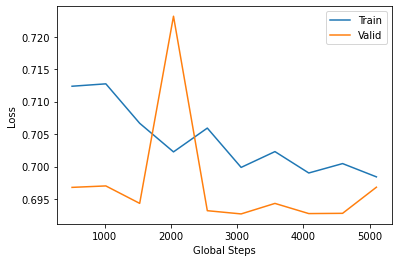

In [11]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics('../chap10/data/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show() 

In [12]:
def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for text, label in test_loader:
            encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
            padded_list =  [e + [0] * (512-len(e)) for e in encoded_list]
        
            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)
            labels = torch.tensor(label)
            output = model(sample, labels=labels)
            
            _, output = output
            y_pred.extend(torch.argmax(output, 1).tolist())
            y_true.extend(labels.tolist())
                    
    print('Classification 결과:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))
    
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")
    
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])

Model loaded from <== e:/torch/chap10/data/model.pt


<ipython-input-12-f9df6714cef0>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)


Classification 결과:
              precision    recall  f1-score   support

           1     0.5091    1.0000    0.6747       558
           0     0.0000    0.0000    0.0000       538

    accuracy                         0.5091      1096
   macro avg     0.2546    0.5000    0.3374      1096
weighted avg     0.2592    0.5091    0.3435      1096



e:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


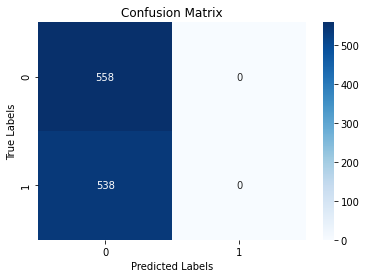

In [14]:
best_model = model.to(device)
load_checkpoint('../chap10/data/model.pt', best_model)
evaluate(best_model, test_loader)

In [1]:
#10.3 한국어 임베딩

In [2]:
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [3]:
text = "나는 파이토치를 이용한 딥러닝을 학습중이다."
marked_text = "[CLS] " + text + " [SEP]"
tokenized_text = tokenizer.tokenize(marked_text)
print(tokenized_text)

['[CLS]', '나는', '파', '##이', '##토', '##치를', '이', '##용한', '딥', '##러', '##닝', '##을', '학', '##습', '##중', '##이다', '.', '[SEP]']


In [4]:
text = "과수원에 사과가 많았다." \
       "친구가 나에게 사과했다."\
       "백설공주는 독이 든 사과를 먹었다."

marked_text = "[CLS] " + text + " [SEP]"
tokenized_text = tokenizer.tokenize(marked_text)
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

[CLS]           101
과             8,898
##수          15,891
##원에         108,280
사             9,405
##과          11,882
##가          11,287
많             9,249
##았다         27,303
.               119
친             9,781
##구          17,196
##가          11,287
나             8,982
##에게         26,212
사             9,405
##과          11,882
##했다         12,490
.               119
백             9,331
##설          31,928
##공          28,000
##주는         100,633
독             9,088
##이          10,739
든             9,115
사             9,405
##과          11,882
##를          11,513
먹             9,266
##었다         17,706
.               119
[SEP]           102


In [5]:
segments_ids = [1] * len(tokenized_text)
print (segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [6]:
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [7]:
model = BertModel.from_pretrained('bert-base-multilingual-cased',
                                  output_hidden_states = True,)

model.eval()

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [8]:
with torch.no_grad():
    outputs = model(tokens_tensor, segments_tensors)
    hidden_states = outputs[2]

In [9]:
print ("계층 수:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
layer_i = 0

print ("배치 수:", len(hidden_states[layer_i]))
batch_i = 0

print ("토큰 수:", len(hidden_states[layer_i][batch_i]))
token_i = 0

print ("은닉층 유닛 수:", len(hidden_states[layer_i][batch_i][token_i]))

계층 수: 13   (initial embeddings + 12 BERT layers)
배치 수: 1
토큰 수: 33
은닉층 유닛 수: 768


In [10]:
print('은닉 상태의 유형: ', type(hidden_states))
print('각 계층에서의 텐서 형태: ', hidden_states[0].size())

은닉 상태의 유형:  <class 'tuple'>
각 계층에서의 텐서 형태:  torch.Size([1, 33, 768])


In [11]:
token_embeddings = torch.stack(hidden_states, dim=0)
token_embeddings.size()

torch.Size([13, 1, 33, 768])

In [12]:
token_embeddings = torch.squeeze(token_embeddings, dim=1)
token_embeddings.size()

torch.Size([13, 33, 768])

In [13]:
token_embeddings = token_embeddings.permute(1,0,2)
token_embeddings.size()

torch.Size([33, 13, 768])

In [14]:
token_vecs_cat = []
for token in token_embeddings:
    cat_vec = torch.cat((token[-1], token[-2], token[-3], token[-4]), dim=0)
    token_vecs_cat.append(cat_vec)
print ('형태는: %d x %d' % (len(token_vecs_cat), len(token_vecs_cat[0])))

형태는: 33 x 3072


In [15]:
token_vecs_sum = []
for token in token_embeddings:
    sum_vec = torch.sum(token[-4:], dim=0)
    token_vecs_sum.append(sum_vec)
print ('형태는: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

형태는: 33 x 768


In [16]:
token_vecs = hidden_states[-2][0]
sentence_embedding = torch.mean(token_vecs, dim=0)
print ("최종 임베딩 벡터의 형태:", sentence_embedding.size())

최종 임베딩 벡터의 형태: torch.Size([768])


In [17]:
for i, token_str in enumerate(tokenized_text):
    print (i, token_str)

0 [CLS]
1 과
2 ##수
3 ##원에
4 사
5 ##과
6 ##가
7 많
8 ##았다
9 .
10 친
11 ##구
12 ##가
13 나
14 ##에게
15 사
16 ##과
17 ##했다
18 .
19 백
20 ##설
21 ##공
22 ##주는
23 독
24 ##이
25 든
26 사
27 ##과
28 ##를
29 먹
30 ##었다
31 .
32 [SEP]


In [18]:
print("사과가 많았다", str(token_vecs_sum[6][:5]))
print("나에게 사과했다", str(token_vecs_sum[10][:5]))
print("사과를 먹었다", str(token_vecs_sum[19][:5]))

사과가 많았다 tensor([-0.5844, -4.0836,  0.4906,  0.8915, -1.8054])
나에게 사과했다 tensor([-0.8631, -3.4047, -0.7351,  0.9805, -2.6700])
사과를 먹었다 tensor([ 0.6756, -0.3618,  0.0586,  2.2050, -2.4193])


In [19]:
from scipy.spatial.distance import cosine
diff_apple = 1 - cosine(token_vecs_sum[5], token_vecs_sum[27])
same_apple = 1 - cosine(token_vecs_sum[5], token_vecs_sum[16])
print('*유사한* 의미에 대한 벡터 유사성:  %.2f' % same_apple)
print('*다른* 의미에 대한 벡터 유사성:  %.2f' % diff_apple)

*유사한* 의미에 대한 벡터 유사성:  0.86
*다른* 의미에 대한 벡터 유사성:  0.91
